# FWHM from KDE peak

A quick estimate the FWHM and upper/lower bounds of a KDE peak

In [2]:
import fwhm_from_kde as ffkde

In [3]:
ffkde.fwhm_from_kde()

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ffkde',
 'fwhm_from_kde']

# Generate some test data and plot it

(15000,)


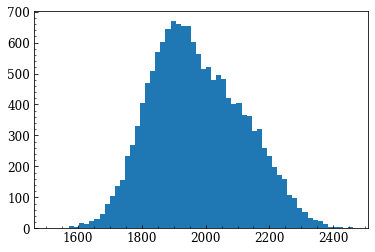

In [2]:
np.random.seed(42)
x = np.append(np.random.normal(1900, 100, size=10000),
              np.random.normal(2120, 100, size=5000))
print(x.shape)

fig,ax = plt.subplots()

_ = ax.hist(x, bins=60)

# Calculate the FWHM of the KDE peak

With authomatic plotting

KDE estimation with kde kernel = 15.919
KDE peak = 1916.009 +235.197, -130.984


NameError: name 'x' is not defined

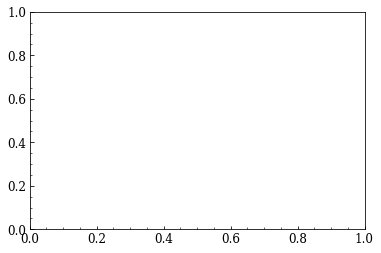

In [4]:
# kde_peak,hwhm_peak_kde_upp,hwhm_peak_kde_low, kde_xy = fwhm_from_kde(x, show=True)
_,_,_,_ = fwhm_from_kde.fwhm_from_kde(x, show=True)

# Plot the result manually

KDE estimation with kde kernel = 15.919
KDE peak = 1916.009 +235.197, -130.984


Text(0, 0.5, 'N')

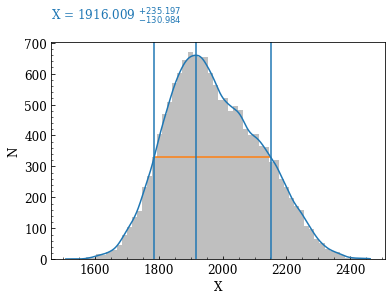

In [6]:
kde_peak,hwhm_peak_kde_upp,hwhm_peak_kde_low, kde_xy = fwhm_from_kde(x, show=False)

dim_par_lab = r'X = {:.3f} $^{{+{:.3f}}}_{{-{:.3f}}}$'.format(
    kde_peak,hwhm_peak_kde_upp-kde_peak,kde_peak-hwhm_peak_kde_low)

fig,ax = plt.subplots()
_ = ax.hist(x, bins=60, color='grey', alpha =.5)
ax.axvline(kde_peak, color='C0')
ax.axvline(hwhm_peak_kde_low, color='C0')
ax.axvline(hwhm_peak_kde_upp, color='C0')
ax.hlines(kde_xy[1][kde_xy[1].argmax()]/2, 
          hwhm_peak_kde_low, hwhm_peak_kde_upp, color='C1')
ax.plot(kde_xy[0], kde_xy[1], '-', color='C0')
ax.text(ax.get_xlim()[0],
        ax.get_ylim()[1]*1.1, '{:s}'.format(dim_par_lab), color='C0')
ax.set_xlabel('X')
ax.set_ylabel('N')


---------

# Use some other data

In [7]:
import pickle
filename = 'data/N_tot_MC_smaple_OMP_R.pickle'
filename = 'data/N_tot_MC_smaple_All.pickle'
with open(filename, 'rb') as f:
    x = pickle.load(f)

In [8]:
np.percentile(x,[15.9,50,84.1])

array([  990.73092484,  3579.07433514, 17294.38213141])

(0.0, 6000.0)

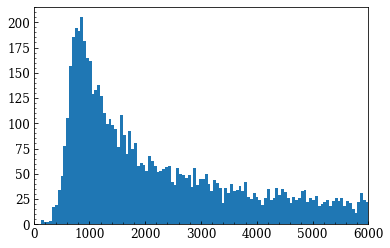

In [9]:
_ = plt.hist(x,bins=5000)
plt.xlim(0,6000)

KDE estimation with kde kernel = 126.645
KDE peak = 838.102 +760.022, -304.009


(0.0, 6000.0)

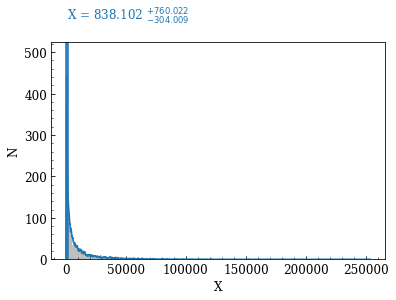

In [11]:

_,_,_,_ = fwhm_from_kde(x, #[x<6000],
                        nbins=2000, n_samples=5000, show=True, )
ax.set_xlim(0,6000)